In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [5]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
# df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

In [6]:
df.head()

,user_id,screen_name,tweet_id,tweet_text,tweet_creation,tweet_fav,tweet_rt,rp_flag,rp_status,rp_user,...,rt_text,rt_creation,rt_fav,rt_rt,Toxicity,Severe Toxicity,NewDateFormat,week,month,day
0,4746709454,just_jusss,911477065328631809,"Having a strict dad, if I ask to go out one we...",1.506159e+09,1.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,0.052305,0.002346,2017-09-23 09:27:21,38,09,23
1,4746709454,just_jusss,911399501264384001,Lookin at all these couples like MBN🤧 but then...,1.506140e+09,2.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,0.068171,0.003433,2017-09-23 04:19:08,38,09,23
2,4746709454,just_jusss,911343372282900480,Being a senior kinda sucks when most of your f...,1.506127e+09,3.0,0.0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,0.518691,0.023787,2017-09-23 00:36:06,38,09,23
3,773711528398848000,CassandraCohan,923729371235586049,@periwinkledink So pretty,1.509076e+09,1.0,0.0,True,923705106264027136,3.434322e+09,...,NaN,NaN,NaN,NaN,0.010681,0.002117,2017-10-27 03:53:38,43,10,27
4,773711528398848000,CassandraCohan,923689995763843072,@readyforramos It’s 2017 we go to church and pray,1.509067e+09,3.0,0.0,True,923689936406044673,2.633570e+09,...,NaN,NaN,NaN,NaN,0.018975,0.001316,2017-10-27 01:17:10,43,10,27


In [7]:
groupDf = df[['user_id', 'tweet_id', 'Toxicity', 'week','month','day']]

In [11]:
groupDf2 = groupDf[['user_id', 'Toxicity','week','month','day']].astype({'user_id': str, 'week': str, 'month': str, 'day': str})

In [12]:
weekDf = groupDf2[groupDf2['week']=="43"]
monthDf = groupDf2[groupDf2['month']=="10"]

In [13]:
dayList = monthDf['day'].unique()
dayList.sort()
print(dayList)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']


In [16]:
groupedDf = monthDf.groupby(['user_id', 'day']).agg({'Toxicity': 'mean'}).reset_index()

In [17]:
days = ['01','02','03','04','05','06','07','08','09','10']
user_toxicity_means = {}
neighbor_toxicity_means = {}

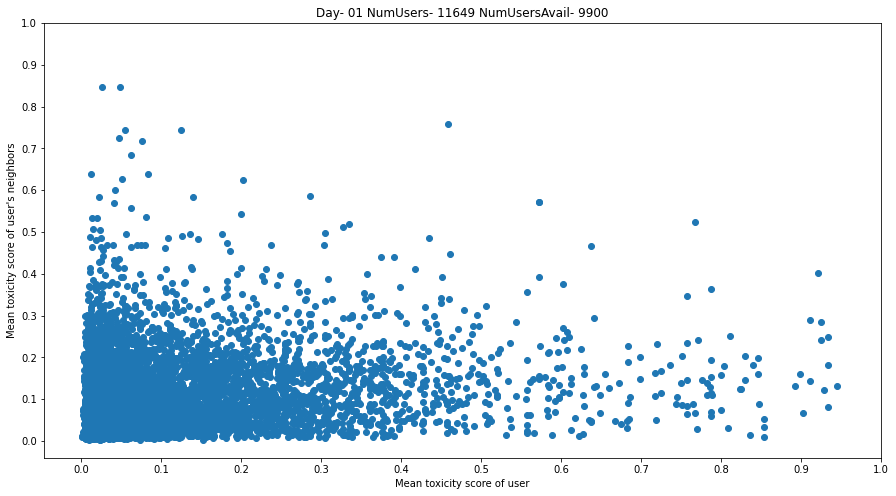

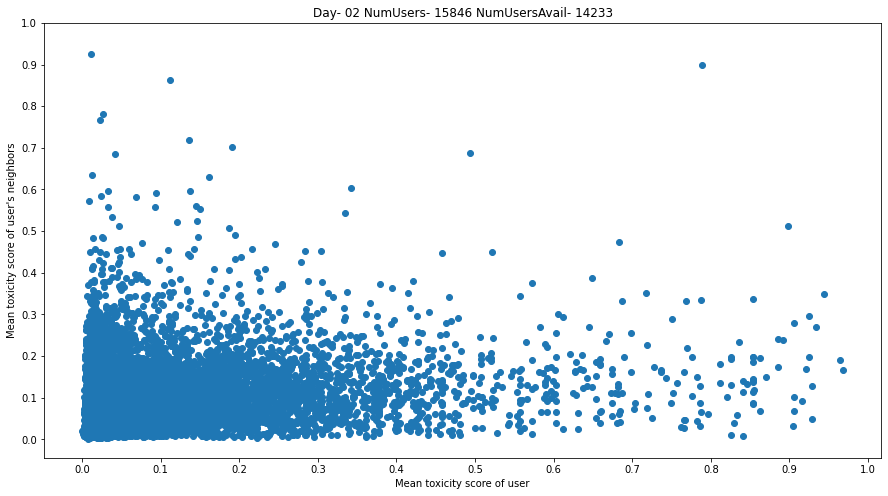

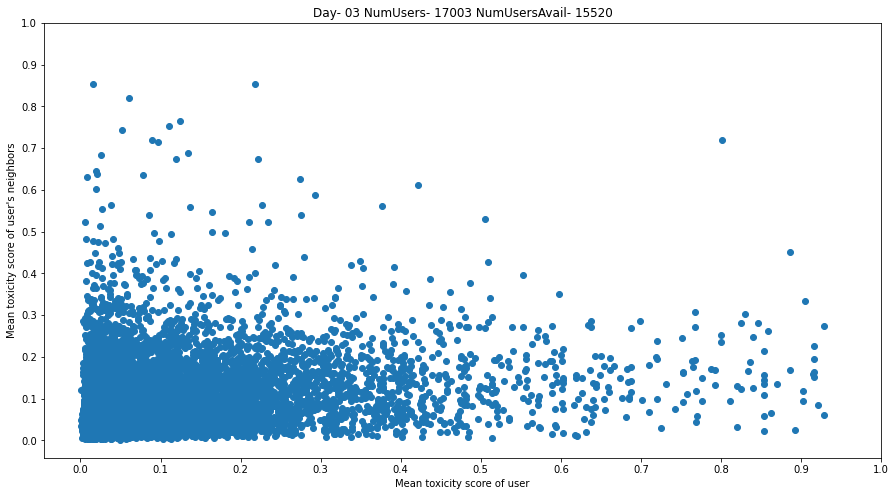

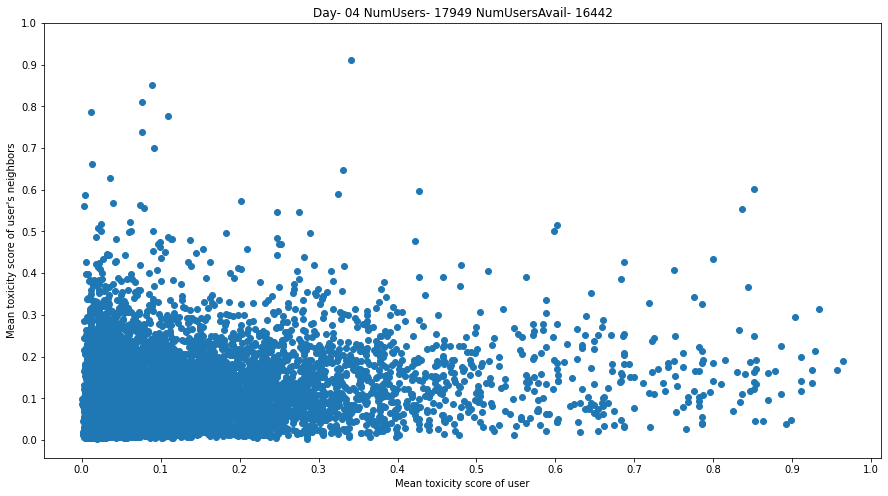

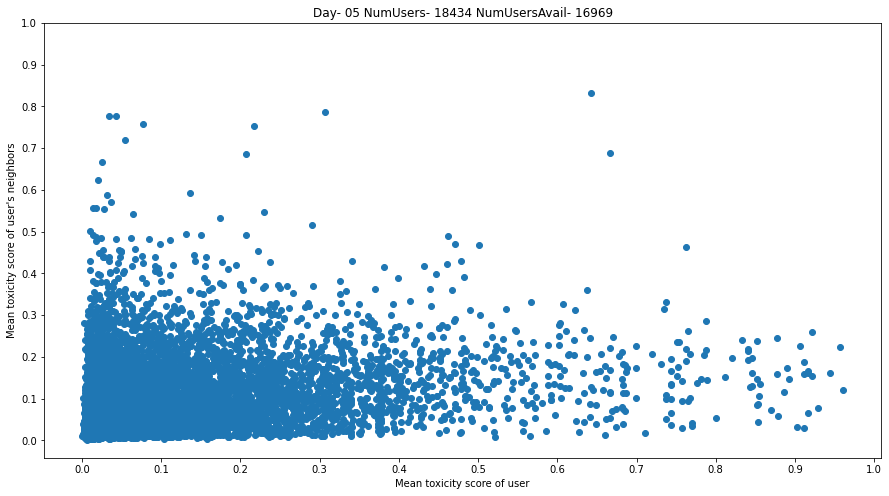

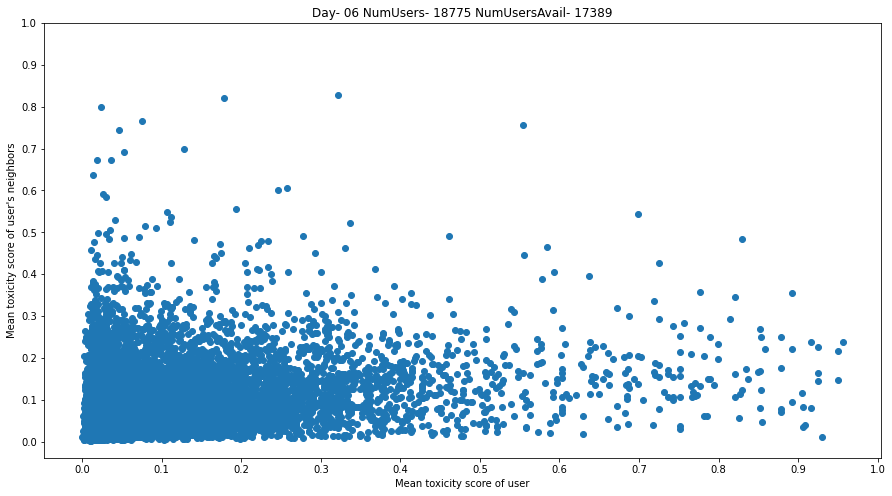

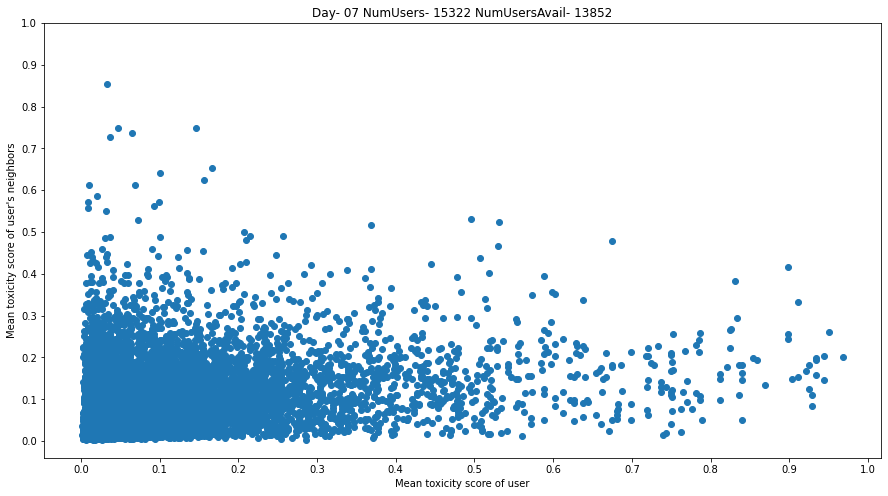

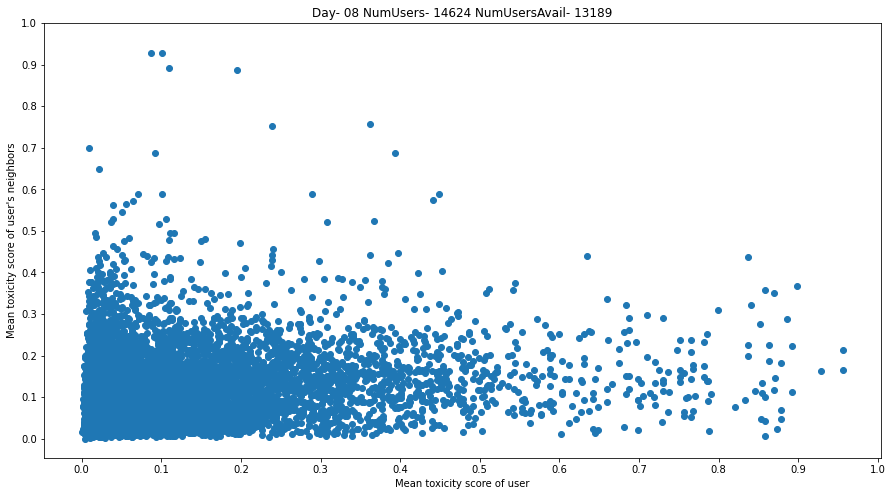

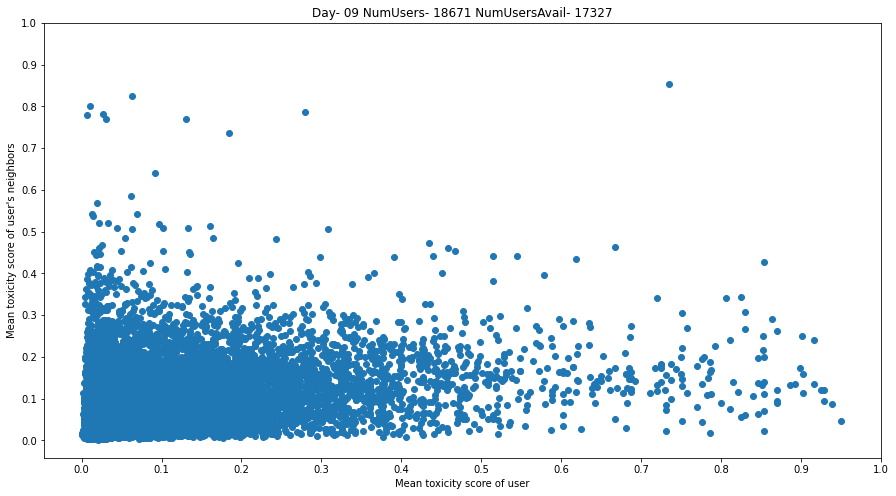

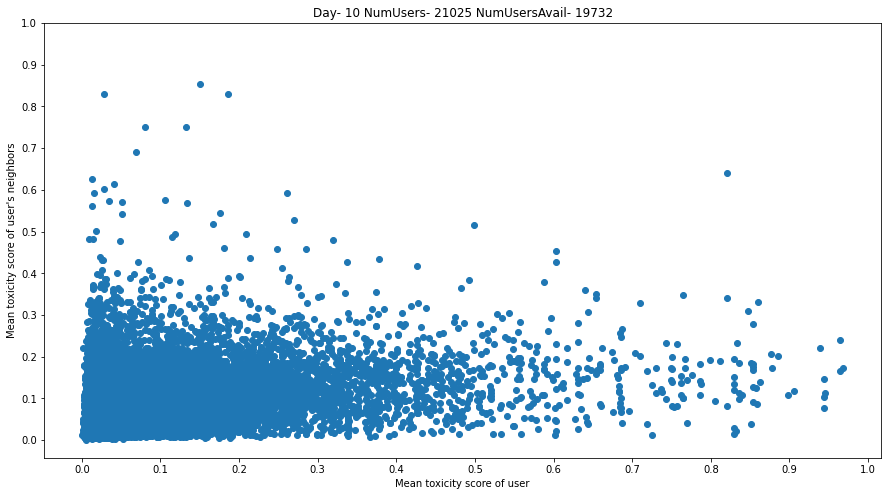

In [18]:
for day in days:
  dayDf = groupedDf[groupedDf['day']== day]
  user_list_day = list(dayDf['user_id'].unique().astype(str))
  G_day = G.subgraph(user_list_day)

  user_toxicity = dayDf.set_index('user_id')['Toxicity'].to_dict()
  neighbor_toxicity = {}
  for user in G_day.nodes():
    neighbors = list(G_day.neighbors(user))
    if user in neighbors:
      neighbors.remove(user)
    if len(neighbors) > 0:
      neighbor_toxicity[user] = dayDf[dayDf['user_id'].isin(neighbors)]['Toxicity'].mean()

  x = [user_toxicity[user] for user in neighbor_toxicity.keys()]
  y = list(neighbor_toxicity.values())

  plt.figure(figsize=(15,8))
  plt.scatter(x, y)
  plt.xlabel('Mean toxicity score of user')
  plt.ylabel('Mean toxicity score of user\'s neighbors')
  plt.title('Day- ' + day + ' NumUsers- '+ str(G_day.number_of_nodes())+' NumUsersAvail- ' +str(len(y)))
  plt.xticks([i/10 for i in range(0, 11)])
  plt.yticks([i/10 for i in range(0, 11)])
